In [1]:
import pandas as np
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, Dense, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [3]:
print(x_train.shape)

(60000, 28, 28)


In [4]:
x_train[0].min(),x_train[1].max()

(0, 255)

In [5]:
x_train=x_train/255
x_test=x_test/255
x_train[0].min(),x_train[0].max()

(0.0, 1.0)

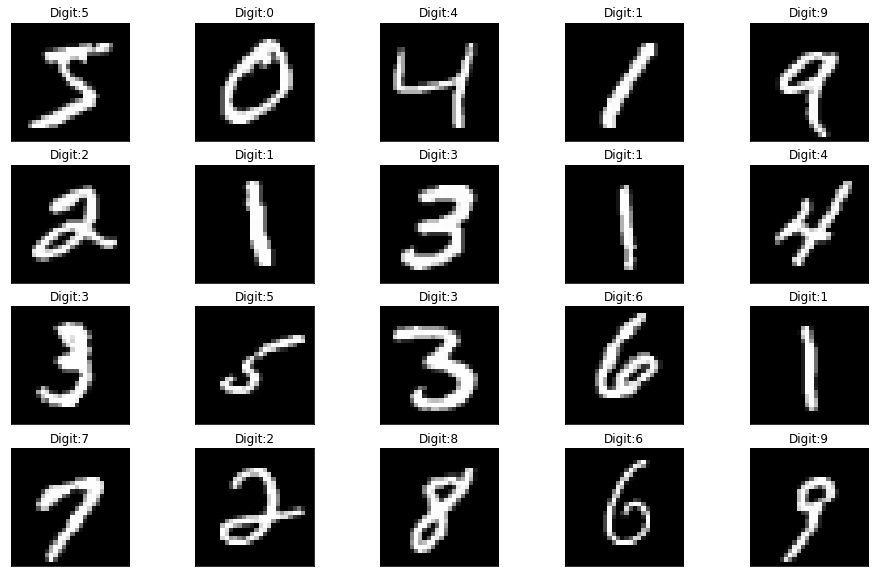

In [6]:
def plot_digit(image, digit, plt, i):
    plt.subplot(4, 5, i + 1)
    plt.imshow(image, cmap= plt.get_cmap("gray"))
    plt.title(f"Digit:{digit}")
    plt.xticks([])
    plt.yticks([])
plt.figure(figsize=(16,10))
for i in range(20):
    plot_digit(x_train[i], y_train[i],plt, i)
plt.show()

In [7]:
x_train = x_train.reshape((x_train.shape+(1,)))
x_test = x_test.reshape((x_test.shape + (1,)))

In [8]:
y_train[0:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [9]:
model = Sequential([
    Conv2D(32,(3, 3), activation="relu", input_shape=(28,28,1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(100, activation ="relu"),
    Dense(10, activation="softmax")
])

In [10]:
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(
optimizer=optimizer,
loss="sparse_categorical_crossentropy",
metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               540900    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 22s 11ms/step - loss: 0.2304 - accuracy: 0.9295
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0747 - accuracy: 0.9779
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0482 - accuracy: 0.9854
Epoch 4/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0344 - accuracy: 0.9896
Epoch 5/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0260 - accuracy: 0.9917
Epoch 6/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0191 - accuracy: 0.9944
Epoch 7/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0142 - accuracy: 0.9961
Epoch 8/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0106 - accuracy: 0.9970
Epoch 9/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0075 - accuracy: 0.9984
Epoch 10/10
1875/1875 [==============================] - 22s 12m

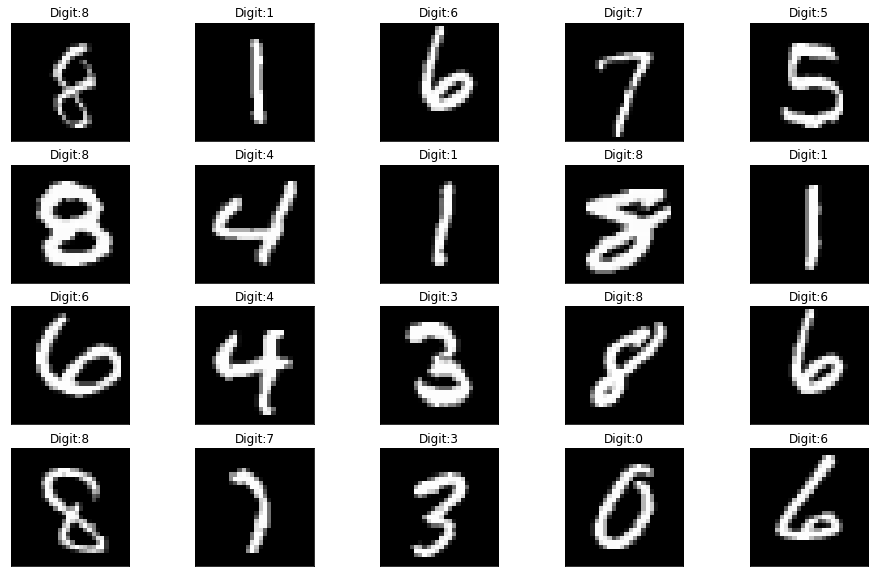

In [13]:
plt.figure(figsize=(16,10))
for i in range(20):
    image = random.choice(x_test).squeeze()
    digit = np.argmax(model.predict(image.reshape((1, 28, 28, 1)))[0], axis=-1)
    plot_digit(image, digit, plt, i)
plt.show()

In [14]:
predictions = np.argmax(model.predict(x_test), axis=-1)
accuracy_score(y_test, predictions)

0.9869

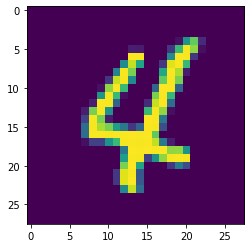

In [15]:
n = random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

In [16]:
predicted_value=model.predict(x_test)
print("Handwritten number in the image = %d" %np.argmax(predicted_value[n]))

Handwritten number in the image = 4


In [18]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test Accuracy:", score[1])

Test loss: 0.044868722558021545
Test Accuracy: 0.9868999719619751
